In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut

In [3]:
df = pd.read_csv("../Part1/houseprices.csv")
df.head()

,Id,LotArea,Street,LotShape,LandContour,Utilities,Neighborhood,BldgType,HouseStyle,OverallQual,...,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageArea,MoSold,YrSold,SalePrice
0,1,8450,Pave,Reg,Lvl,AllPub,CollgCr,1Fam,2Story,7,...,3,1,Gd,8,0,Attchd,548,2,2008,208500
1,2,9600,Pave,Reg,Lvl,AllPub,Veenker,1Fam,1Story,6,...,3,1,TA,6,1,Attchd,460,5,2007,181500
2,3,11250,Pave,IR1,Lvl,AllPub,CollgCr,1Fam,2Story,7,...,3,1,Gd,6,1,Attchd,608,9,2008,223500
3,4,9550,Pave,IR1,Lvl,AllPub,Crawfor,1Fam,2Story,7,...,3,1,Gd,7,1,Detchd,642,2,2006,140000
4,5,14260,Pave,IR1,Lvl,AllPub,NoRidge,1Fam,2Story,8,...,4,1,Gd,9,1,Attchd,836,12,2008,250000


In [4]:
df.dropna(inplace=True)
df = pd.get_dummies(df)

In [5]:
abs_errors = []

y = df["SalePrice"]
X = df.copy(deep=True)
X.drop(["SalePrice"], axis=1, inplace=True)


loo_generator = LeaveOneOut()
reg = LinearRegression()

for train_index, test_index in loo_generator.split(X):
    #subset dataframe
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #fit model
    reg.fit(X_train, y_train)

    #predict missing datapoint
    y_pred = reg.predict(X_test)

    #add absolute difference to list
    abs_errors.append(abs(y_test.to_numpy() - y_pred)[0])



In [6]:
mean_abs_error = np.sum(abs_errors)/len(abs_errors)
mean_abs_error

20101.77897423568

In [7]:
#part 3

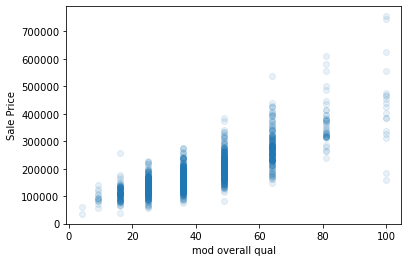

In [34]:
#this transformation makes it "look more linear". In final submission, probably show original  plot
# and this side by side and justify. Same for below
mod_oq = [np.power(x, 2) for x in df["OverallQual"].tolist()]
plt.scatter(x=mod_oq, y = df["SalePrice"].tolist(), alpha=0.1)
plt.xlabel("mod overall qual")
plt.ylabel("Sale Price")
plt.show()

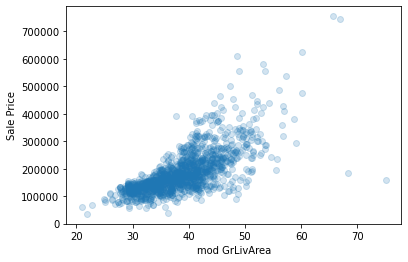

In [23]:
log_gla = [np.sqrt(x) for x in df["GrLivArea"].tolist()]
plt.scatter(x=log_gla, y = df["SalePrice"].tolist(), alpha=0.2)
plt.xlabel("mod GrLivArea")
plt.ylabel("Sale Price")
plt.show()

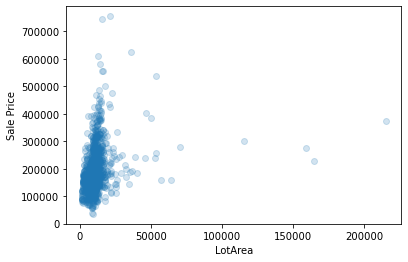

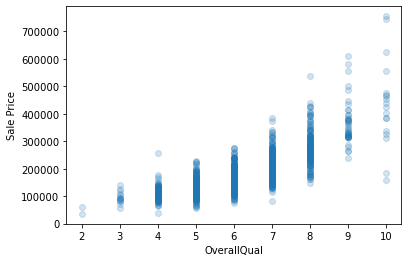

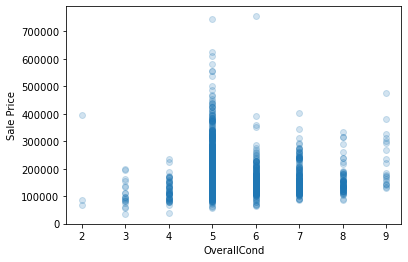

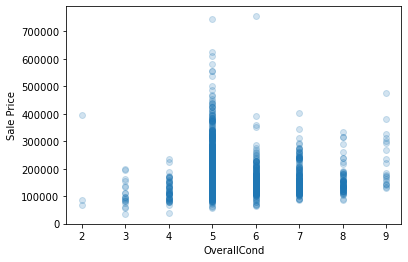

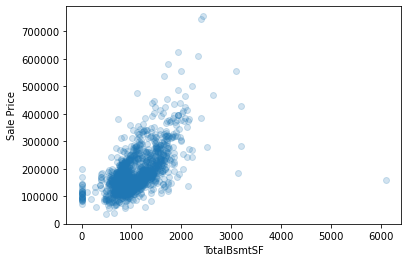

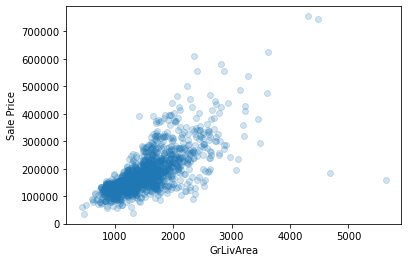

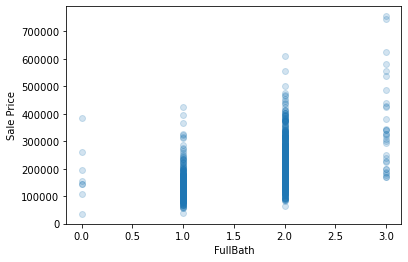

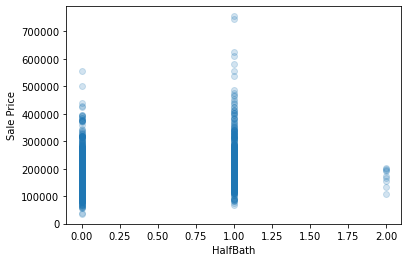

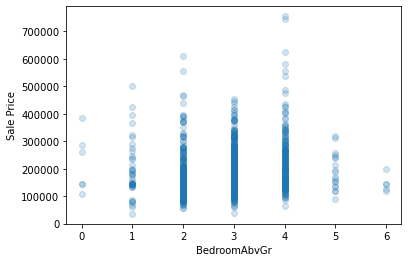

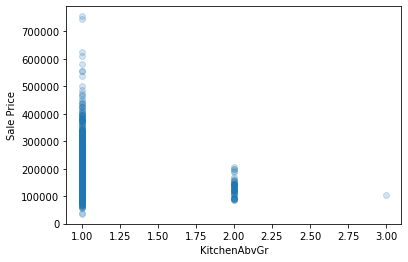

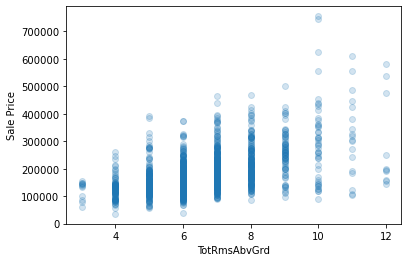

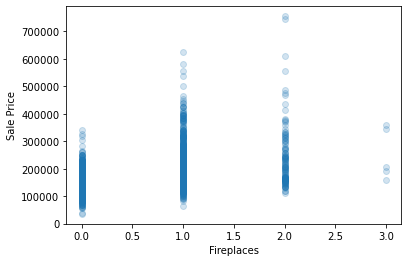

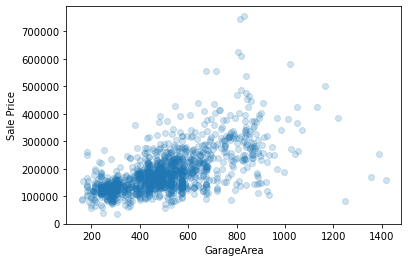

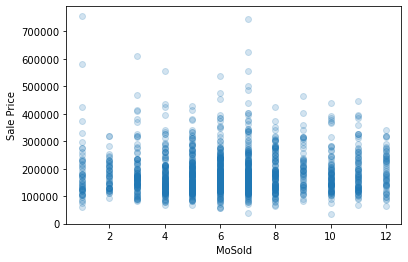

In [17]:
cols_to_investigate = ["LotArea", "OverallQual", "OverallCond", "OverallCond", "TotalBsmtSF", "GrLivArea", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageArea", "MoSold"]
for i in cols_to_investigate:
    plt.scatter(x=df[i].tolist(), y = df["SalePrice"].tolist(), alpha=0.2)
    plt.xlabel(i)
    plt.ylabel("Sale Price")
    plt.show()

In [35]:
mod_gla = [np.sqrt(x) for x in df["GrLivArea"].tolist()]
mod_oq = [np.power(x, 2) for x in df["OverallQual"].tolist()]
df["GrLivArea"] = mod_gla
df["OverallQual"] = mod_oq

In [36]:
abs_errors = []

y = df["SalePrice"]
X = df.copy(deep=True)
X.drop(["SalePrice"], axis=1, inplace=True)


loo_generator = LeaveOneOut()
reg = LinearRegression()

for train_index, test_index in loo_generator.split(X):
    #subset dataframe
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #fit model
    reg.fit(X_train, y_train)

    #predict missing datapoint
    y_pred = reg.predict(X_test)

    #add absolute difference to list
    abs_errors.append(abs(y_test.to_numpy() - y_pred)[0])



In [37]:
mean_abs_error = np.sum(abs_errors)/len(abs_errors)
mean_abs_error

20075.10347249162